# Подготовка данных

## Импорт библиотек и чтение данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#читаем исходные файлы
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

## Предобработка данных

### Таблица `visits`

In [3]:
#отберем первые 5 строк таблицы для знакомства с данными
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#Теперь посмотрим на размер таблицы и типы данных
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


<span style="text-decoration:underline">Промежуточные выводы:</span>

1. Столбец `device` содержит явно строковое значение, содержащее, скорее всего категорийную переменную - тип устройства, которое использовал пользователь при посещении ресурса;
2. Столбцы `End Ts` и `Start Ts` имеют строковый тип данных, хотя явно являются датой;
3. В данных нет никаких пропусков
4. В датасете присутствует столбец `Source Id`, содержащий идентификатор некоего источника. 

<span style="text-decoration:underline">Требуется:</span>

1. Проверить корректность данных в столбце `device` - нет ли в нем дубликатор из-за некорректного указания типа устройства
2. Преобразовать тип данных в столбцах `End Ts` и `Start Ts` в дату
3. Изучить столбец `Source Id`

In [5]:
#проверим столбец Device
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Столбец `device` содержит всего два различных значения: 

- `desktop`, что вероятнее всего, обозначает "настольный" браузер: то есть, это стационарный компьютер или ноутбук
- `touch` - это смартфон или планшет с сенсорным экраном и соответствующей версией браузера

In [6]:
#делаем преобразование типа данных в столбцах с датой/временем начала и окончания визитов в дату
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [7]:
#проверяем результат и видим, что преобразование произошло успешно
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
#снова отберем первые 5 строк таблицы для знакомства с данными и видим, что визуально данные не поменялись, но сейчас мы 
#сможем корректно обрабатывать их при помощи инструментов для работы с датами
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
#оценим распределение строк таблицы по различным значениям столбца
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

Столбец `Source Id`: 

1. Содержит 9 различных числовых значений от 1 до 10 (исключая 8)
2. Наименее популярное значение - 6, наиболее популярное значение - 4

Вероятно, столбец характеризует источники визитов (переходов) на анализируемый ресурс. Однако не располагая расшифровкой идентификаторов источником, мы не можем однозначно трактовать эти данные.

### Таблица `orders`

In [10]:
#отберем первые 5 строк таблицы для знакомства с данными
display(orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
#Теперь посмотрим на размер таблицы и типы данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Таблица `orders` содержит меньше значений и столбцов. 

1. Столбец `Buy Ts` содержит дату, однако тип данных столбца строковый - требуется преобразование в дату
2. Столбец `Revenue` содержит сумму заказа. Тип данных корректный - число с плавающей точкой, однако требуется изучить его на предмет наличия явных выбросов

In [12]:
#преобразуем тип данных
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.info() #посмотрим на результат преобразования

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
orders['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [14]:
display(orders.query('Revenue > 2000'))

,Buy Ts,Revenue,Uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777


In [15]:
print('Количество записей таблицы orders с Revenue более 2000:', len(orders.query('Revenue > 2000')))

Количество записей таблицы orders с Revenue более 2000: 1


<span style="text-decoration:underline">Промежуточные выводы:</span>

1. Мы видим, что сумма 75% заказов не превышает 4.89 у.е.
2. На фоне значения третьего квартиля максимум выглядит очень необычно и, возможно, является либо ошибкой, либо заказом с "нетрадиционным" поведением покупателя

### Таблица `costs`

In [16]:
#отберем первые 5 строк таблицы для знакомства с данными
display(costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


По аналогии с вышеприведенными таблицами: 

1. Требуется преобразование типа данных столбца `dt` в дату
2. Проверка сумм расходов на наличие выбросов

In [18]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

Мы видим, что максимальное значение превышает значение третьего квартиля более, чем в 10 раз. Посмотрим, на эти значения:

In [20]:
#отберем строки с суммой расходов более 1000 у.е.
display(costs.query('costs > 1000'))

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18


Мы видим, что таких записей всего две - это наводит на мысль о какой-то ошибке. Однако у нас есть привязка к категорийной переменной `source_id`, поэтому сразу же посмотрим на распределение строк с суммой расходов более некоего "высокого" значения: 

In [21]:
#посмотрим, как распределяются по источникам строки, в которых сумма расходов превышает 500 у.е.
costs.query('costs > 500')['source_id'].value_counts()

3    95
4     8
5     1
2     1
Name: source_id, dtype: int64

Мы видим, 95 из 105 записей относятся к источнику 3. Вероятно, реклама там стоит дорого поэтому сумма в 1788 у.е. хоть и высока, но в целом вписывается в общую тенденцию.

# Расчет метрик

## Продуктовые метрики

### DAU, WAU, MAU

In [22]:
#для расчета количества активных пользователей в рамках различных временных промежутков нам потребутся столбцы с датой, 
#днем недели, месяцев и годом визита пользователя на сайт
visits['visit_year'] = visits['Start Ts'].dt.year
visits['visit_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['visit_week'] = visits['Start Ts'].dt.week
visits['visit_date'] = pd.to_datetime(visits['Start Ts'].dt.date)

In [23]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
Device         359400 non-null object
End Ts         359400 non-null datetime64[ns]
Source Id      359400 non-null int64
Start Ts       359400 non-null datetime64[ns]
Uid            359400 non-null uint64
visit_year     359400 non-null int64
visit_month    359400 non-null datetime64[ns]
visit_week     359400 non-null int64
visit_date     359400 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(3), object(1), uint64(1)
memory usage: 24.7+ MB


In [24]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


In [25]:
#сформируем датафрейм с количеством уникальных пользователей с разбивкой по дням
dau = visits.groupby('visit_date').agg({'Uid': 'nunique'}).reset_index()
dau.columns = ['visit_date', 'users']

In [26]:
display(dau.head())

,visit_date,users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [27]:
#сформируем датафрейм с wau
wau = visits.groupby(['visit_year', 'visit_week']).agg({'Uid': 'nunique'})
print(wau.head())

                        Uid
visit_year visit_week      
2017       22          2021
           23          4129
           24          2812
           25          2878
           26          3064


In [28]:
#сформируем датафрейм с mau
mau = visits.groupby(['visit_year', 'visit_month']).agg({'Uid': 'nunique'})
print(mau)

                          Uid
visit_year visit_month       
2017       2017-06-01   13259
           2017-07-01   14183
           2017-08-01   11631
           2017-09-01   18975
           2017-10-01   29692
           2017-11-01   32797
           2017-12-01   31557
2018       2018-01-01   28716
           2018-02-01   28749
           2018-03-01   27473
           2018-04-01   21008
           2018-05-01   20701


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Изменение количества уникальных посетителей по месяцам')

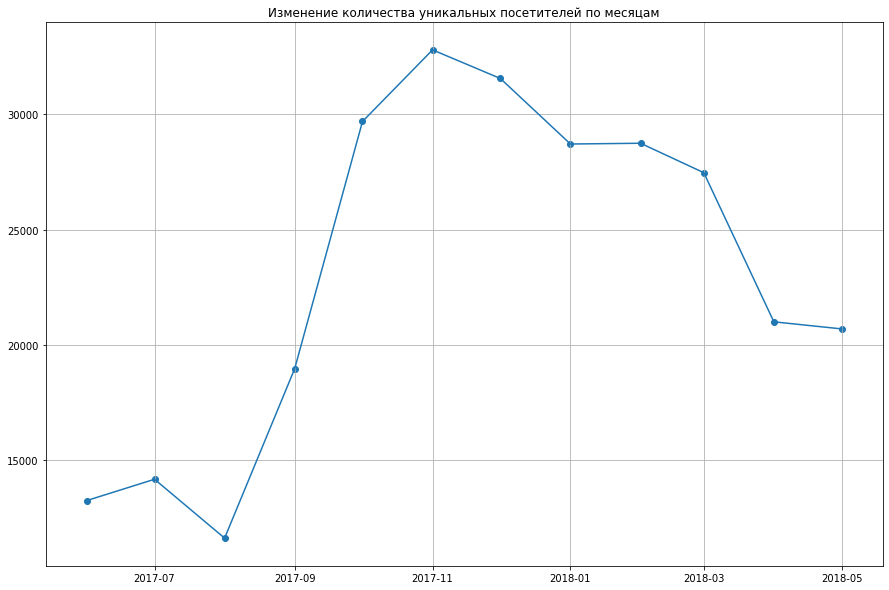

In [29]:
#так как мы имеем дело с колебаниями параметра во времени, для визуализации подойдет классический график временного ряда
#для исключения путаницы данных мы сформируем датафрейм с количеством уникальных пользователей по месяцам
mau = visits.groupby(['visit_year', 'visit_month']).agg({'Uid': 'nunique'}).reset_index()

plt.figure(figsize=(15, 10))
plt.plot('visit_month', 'Uid', data=mau, color='tab:blue')
plt.scatter('visit_month', 'Uid', data=mau)
plt.grid(axis='both')
plt.title("Изменение количества уникальных посетителей по месяцам")

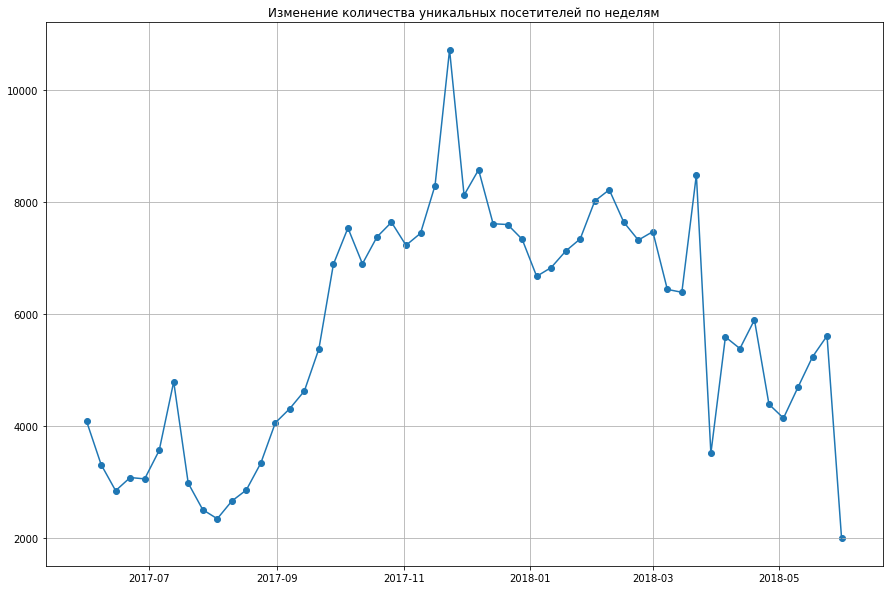

In [30]:
visits['current_week'] = visits['Start Ts'].astype('datetime64[W]')

wau2 = visits.groupby('current_week').agg({'Uid': 'nunique'}).reset_index()

plt.figure(figsize=(15, 10))
plt.plot('current_week', 'Uid', data=wau2, color='tab:blue')
plt.scatter('current_week', 'Uid', data=wau2)
plt.grid(axis='both')
plt.title("Изменение количества уникальных посетителей по неделям")

del visits['current_week']

In [31]:
print('Среднее количество уникальных пользователей в день за период, чел/день:', dau['users'].mean().round())
print('Среднее количество уникальных пользователей в неделю за период, чел/неделя:', wau['Uid'].mean().round())
print('Среднее количество уникальных пользователей в месяц за период, чел/месяц:', mau['Uid'].mean().round())

Среднее количество уникальных пользователей в день за период, чел/день: 908.0
Среднее количество уникальных пользователей в неделю за период, чел/неделя: 5716.0
Среднее количество уникальных пользователей в месяц за период, чел/месяц: 23228.0


<span style="text-decoration:underline">Промежуточные выводы:</span>

1. Мы видим, что в августе-октябре 2017 года зарегистрировано два разких скачка количества уникальных пользователей. Вероятно, какое-то событие произошло в этот временной промежуток: например, наш сервис стал более активно рекламироваться или естественным образом вырос спрос на продукцию, которую продает сервис;
2. При понедельной разбивке видно, что где-то в конце ноября наблюдался существенный пик количества уникальных пользователей - это событие носит явно единоразовый характер и скорее всего обусловлено пиковым спросом на какой-то продукт
3. Также следует обратить внимание на серьезную просадку количества уникальных пользователей в марте 2018 года - это видно как на графике помесячного распределения, так и на понедельном графике. Однако на подельном графике лучше видна "волнообразность" количества пользователей (количество колебалось в диапазоне от 1200 до 3000 уникальных пользователей в неделю

### Среднее количество визитов пользователя на сайт в день

In [32]:
#сформируем датафрейм, в котором посчитаем среднее количество визитов на сайт для 1 пользователя с разбивкой по дням
visits_per_user = visits.groupby('visit_date').agg({'Uid': ['count', 'nunique']}).reset_index()
visits_per_user.columns = ['visit_date', 'visits', 'unique_users']
visits_per_user['visits_per_user'] = visits_per_user['visits'] / visits_per_user['unique_users']

In [33]:
#оценим результат
print(visits_per_user.head())

  visit_date  visits  unique_users  visits_per_user
0 2017-06-01     664           605         1.097521
1 2017-06-02     658           608         1.082237
2 2017-06-03     477           445         1.071910
3 2017-06-04     510           476         1.071429
4 2017-06-05     893           820         1.089024


In [34]:
#теперь посчитаем среднее количество визитов на пользователя за весь период
print('Среднее количество визитов на сайт в день для 1 пользователя:', visits_per_user['visits_per_user'].mean())

Среднее количество визитов на сайт в день для 1 пользователя: 1.082169644003972


Мы видим, что в среднем пользователи заходят на сайт 1 раз в день, что звучит логично - одного раза достаточно как для ознакомления со списком новинок, так и для оформления заказа. 

### Среднее время сессии на сайте

In [35]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


In [36]:
#для подсчета среднего времени пользователя на сайте сформируем отдельный столбец, куда запишем длину сессии в секундах
visits['visit_lenght'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

In [37]:
visits['visit_lenght'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: visit_lenght, dtype: float64

Вы видим, что максимальное значение в ряду - 84480 секунд, что примерно равно 23.5 часам. Маловероятно, что кто-то действительно провел столько времени на сайте. Вероятно, в течение этого времени была открыта страница на компьютере пользователя, либо это ошибка. Посмотрим, как много аномальных записей в нашей таблице.

In [38]:
print('Доля записей, от которых мы откажемся, ограничив максимальное время сессии 3600 секундами: {0:.3f}%'\
      .format(len(visits.query('visit_lenght > 3600'))/len(visits)*100))

print('Доля записей, от которых мы откажемся, ограничив максимальное время сессии 7200 секундами: {0:.3f}%'\
      .format(len(visits.query('visit_lenght > 7200'))/len(visits)*100))

Доля записей, от которых мы откажемся, ограничив максимальное время сессии 3600 секундами: 1.748%
Доля записей, от которых мы откажемся, ограничив максимальное время сессии 7200 секундами: 0.254%


Мы видим, что огранив верхнюю планку продолжительности сессии 2 часами, мы откажемся от учета в построении гистограммы менее 0.3%, что вполне оправданно для понимания, какая мера центральной тенденции в наибольшей степени подходит для оценки продолжительности типичной сессии.

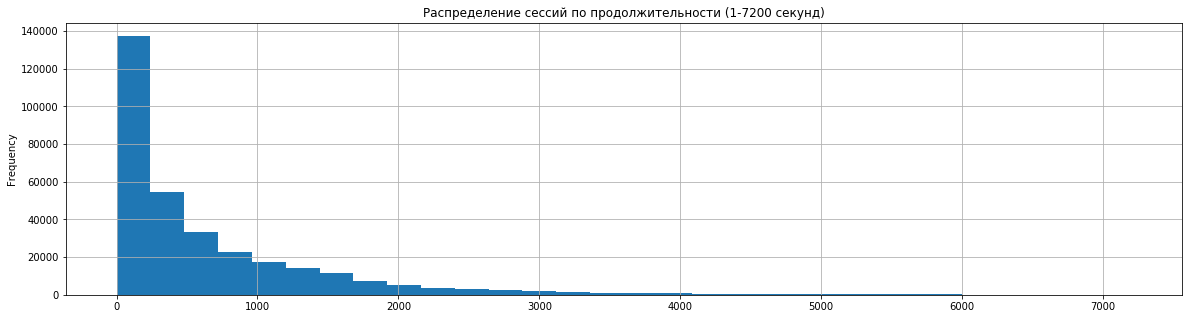

In [39]:
#построим гистограмму распределения продолжительности визитов
visits['visit_lenght'].plot(kind='hist', grid=True, bins=30, figsize=(20, 5), range=(1, 7200),\
                            title='Распределение сессий по продолжительности (1-7200 секунд)')

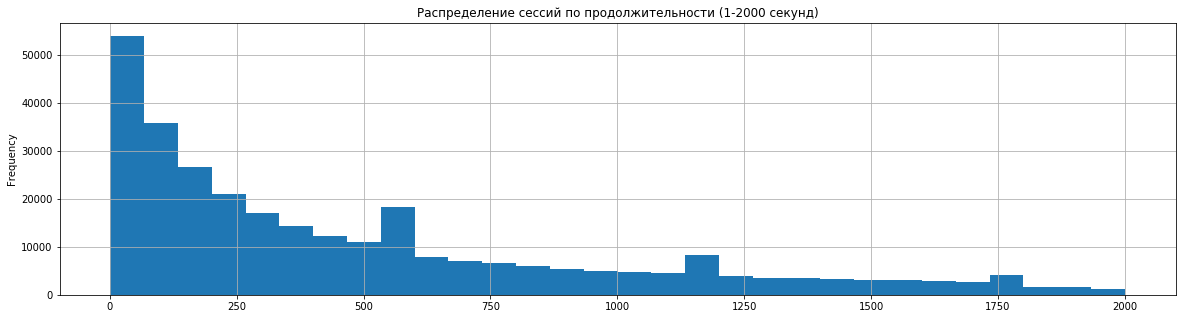

In [40]:
visits['visit_lenght'].plot(kind='hist', grid=True, bins=30, figsize=(20, 5), range=(1, 2000),\
                            title='Распределение сессий по продолжительности (1-2000 секунд)')

Несмотря на скорректированный диапазон значений продолжительности сессий, распределение все равно далеко от нормального. Попробуем взглянуть на среднее значение и медиану для диапазона значений, который мы использовали для построения гистограммы.

In [41]:
visits.query('visit_lenght > 0 and visit_lenght < 7200')['visit_lenght'].describe()

count    322666.000000
mean        686.264038
std         860.749086
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max        7140.000000
Name: visit_lenght, dtype: float64

Оценивая график, нетрудно прийти к выводу о том, что среднее будет очень сильно смещено вправо в силу наличия очень больших значений в ряду. Так оно и есть - средняя продолжительность сессии чуть более 11 минут, что меньше аналогичного значения для всего датасета (за счет отказа от анализа нулевых значений). Медианное значение гораздо меньше - всего 6 минут, однако гистограммы все равно говорят нам, что эта цифра будет завышенное. По этой причине мы посчитаем моду нашего ряда значений. 

In [42]:
print(visits['visit_lenght'].mode())

0    60
dtype: int64


Мода нашего ряда лежит на отметке - 60 секунд, поэтому примем, что "типичная" сессия на сайте длится 60 секунд.

### Retention Rate

In [43]:
#определим месяц первого визита для каждого идентификатора пользователя 
#first_visit_month = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visit_month = visits.groupby('Uid').agg({'visit_date': 'min'}).reset_index()
first_visit_month.columns = ['user_id', 'first_visit_ts']
first_visit_month['first_visit_month'] = first_visit_month['first_visit_ts'].astype('datetime64[M]')

In [44]:
#объединяем таблицы
visits = visits.merge(first_visit_month, left_on='Uid', right_on='user_id')
del visits['user_id']

In [45]:
#формируем датафрейм с когортами по месяцам и вычисляем время жизни когорты
monthly_cohorts = visits
monthly_cohorts['cohort_lifetime'] = ((monthly_cohorts['visit_month'] - monthly_cohorts['first_visit_month'])/np.timedelta64(1, 'M')).round().astype('int')
monthly_cohorts.head()

,Device,End Ts,Source Id,Start Ts,Uid,visit_year,visit_month,visit_week,visit_date,visit_lenght,first_visit_ts,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,1680,2018-03-09,2018-03-01,0


In [46]:
#считаем первичное количество пользователей в каждой когорте по месяцу, объединяем таблицы и считаем retention
m_cohorts = monthly_cohorts.groupby(['first_visit_month', 'cohort_lifetime']).agg({'Uid': 'nunique'}).reset_index()
initial_users_count = m_cohorts[m_cohorts['cohort_lifetime'] == 0][['first_visit_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'})
m_cohorts = m_cohorts.merge(initial_users_count, on='first_visit_month')
m_cohorts['retention'] = m_cohorts['Uid']/m_cohorts['cohort_users']

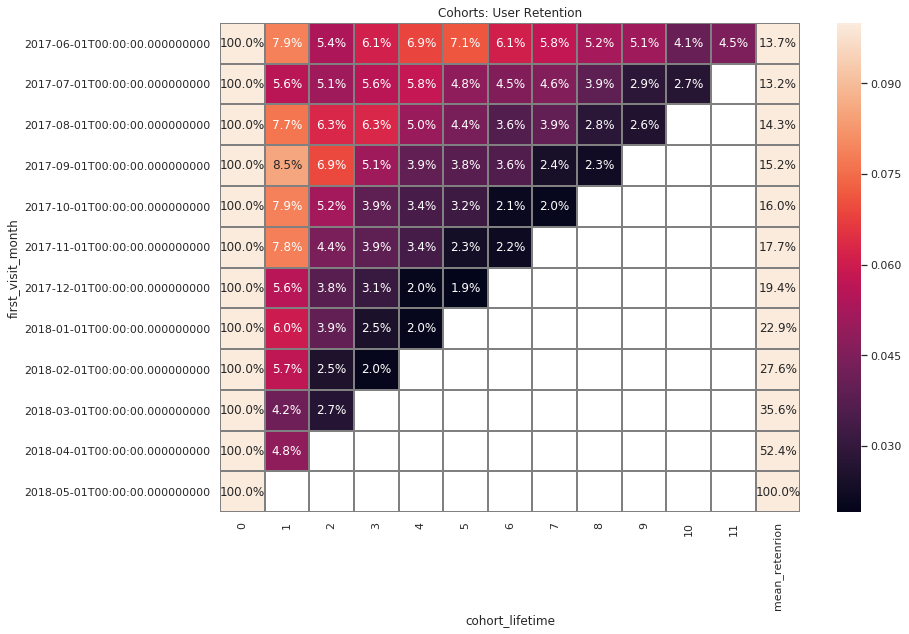

In [47]:
#формируем пивотку с коэффициентом удержания для помесячных когорт
m_retention_pivot = m_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention')
m_retention_pivot['mean_retenrion'] = m_retention_pivot.mean(axis=1)

#и строим тепловую карту по сводной таблице
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(m_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Построим аналогичную схему 

In [48]:
#удалим столбец с месяцем первого визита из ранее созданного датафрейма
del first_visit_month['first_visit_month']

In [49]:
#вычислим дату начала недели для даты первого визита каждой строки датафрейма
visits['first_visit_week'] = pd.to_datetime(visits['first_visit_ts'], unit='d')\
- pd.to_timedelta(visits['first_visit_ts'].dt.dayofweek, unit='d')

In [50]:
#вычислим начало недели для даты текущего визита
visits['visit_week_date'] = pd.to_datetime(visits['Start Ts'], unit='d')\
- pd.to_timedelta(visits['Start Ts'].dt.dayofweek, unit='d')

In [51]:
#вычислим lifetime когорты
visits['weekly_cohort_lifetime'] = ((visits['visit_week_date'] - visits['first_visit_week']) / np.timedelta64(1,'W')).astype(int)

In [52]:
#уберем время из даты 
visits['visit_week_date'] = pd.to_datetime(visits['visit_week_date']).astype('datetime64[W]')
visits['first_visit_week'] = pd.to_datetime(visits['first_visit_week']).astype('datetime64[W]')

In [53]:
#сформируем датафрейм с количеством уникальных юзеров
w_cohorts = visits.groupby(['first_visit_week', 'weekly_cohort_lifetime']).agg({'Uid': 'nunique'}).reset_index()

In [54]:
w_cohorts[w_cohorts['weekly_cohort_lifetime'] != 0].sample(10)

,first_visit_week,weekly_cohort_lifetime,Uid
1322,2018-02-15,11,23
654,2017-08-31,3,97
192,2017-06-15,36,32
1338,2018-02-22,12,33
1284,2018-02-01,6,66
782,2017-09-21,17,58
1223,2018-01-11,2,148
643,2017-08-24,32,12
368,2017-07-13,18,76
470,2017-07-27,29,23


In [55]:
#через уже существующую переменную посчитаем изначальное количество пользователей в каждой когорте
initial_users_count = w_cohorts[w_cohorts['weekly_cohort_lifetime'] == 0][['first_visit_week', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'})

In [56]:
#присоединим данные с количеством пользователей в когорте на нулевом цикле lifetime
w_cohorts = w_cohorts.merge(initial_users_count, on='first_visit_week')

In [57]:
#считаем коэффициент удержания
w_cohorts['retention'] = w_cohorts['Uid']/w_cohorts['cohort_users']

In [58]:
#формируем пивотку с коэффициентом удержания для помесячных когорт
w_retention_pivot = w_cohorts.pivot_table(index='first_visit_week', columns='weekly_cohort_lifetime', values='retention')

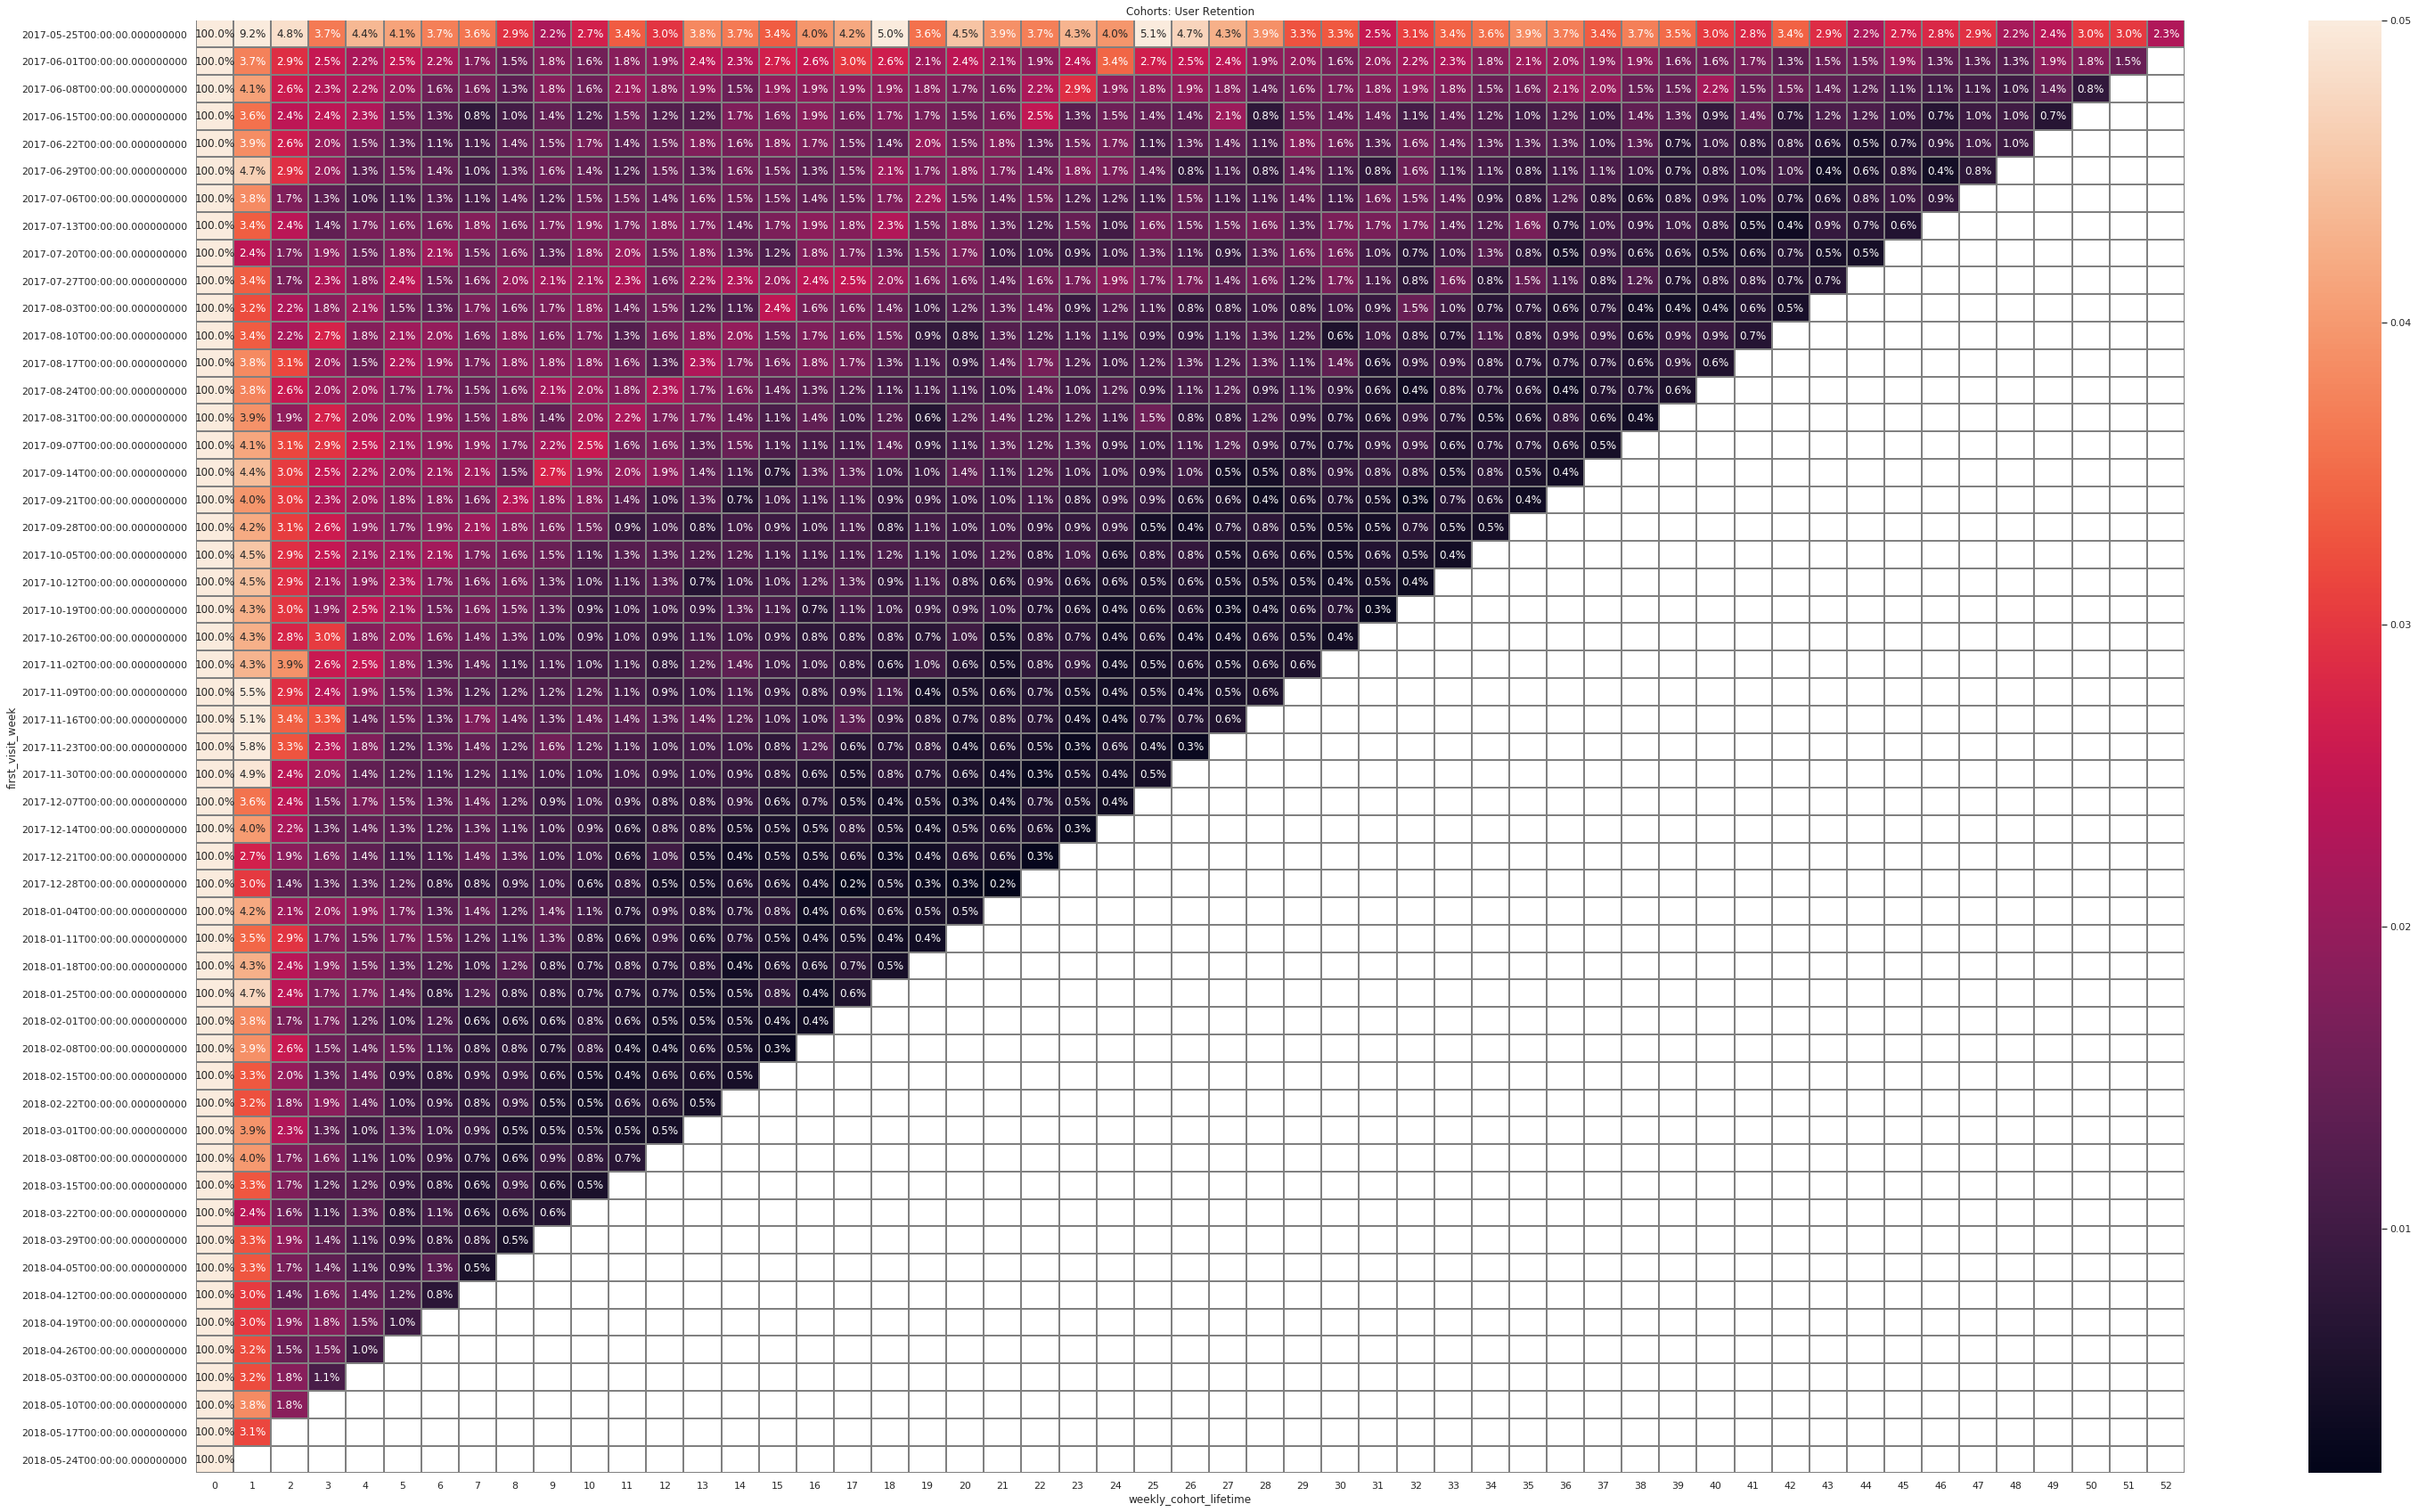

In [59]:
#построим тепловую карту для понедельных когорт
sns.set(style='white')
plt.figure(figsize=(50, 30))
plt.title('Cohorts: User Retention')
sns.heatmap(w_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.05); 

Text(0.5, 1.0, 'Динамика начального количества пользователей в каждой понедельной когорте')

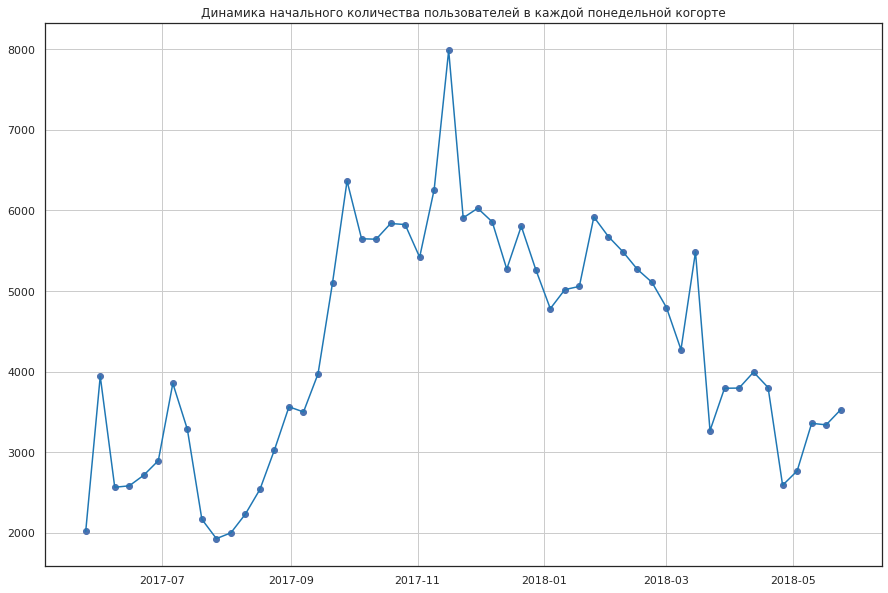

In [60]:
plt.figure(figsize=(15, 10))
plt.plot('first_visit_week', 'cohort_users', data=initial_users_count, color='tab:blue')
plt.scatter('first_visit_week', 'cohort_users', data=initial_users_count)
plt.grid(axis='both')
plt.title("Динамика начального количества пользователей в каждой понедельной когорте")

<span style="text-decoration:underline">Выводы:</span>

1. Мы видим, что в целом Retention Rate не слишком высокий: он колеблется в диапазоне 2-5% для разных когорт и в разные периоды
2. Помесячный когортный анализ показывает, что наиболее высокий RR в первый месяц у когорт августа и октября 2017 года, а также января 2018 года
3. Мы видим, что более "поздние" помесячные когорты в целом показывают меньший коэффициент удержания. Возможно, более ранние когорты сформировали некое ядро аудитории ресурса, которое проявляет большую лояльность - такой сценарий возможен, например, при появлении альтернативных ресурсов на старте более поздних когорт
4. Более детальный анализ понедельных когорт показывает, что наиболее "устойчивая" когорта - это неделя 25 мая 2017 года: даже к поздним временным отрезкам RR колеблется в диапазоне 2.5-3%, что выше аналогичного значения для более поздних когорт
5. Однако динамика изначального количества пользователей показывает, что "на старте" было не так много уникальных пользователей - порядка 2000. До столь же низкого значения количество уникальных пользователей на старте когорты опускалось только в конце июля-начале августа 2017 года. 
6. С августа до октября 2017 мы наблюдаем стремительный рост количества пользователей до уровня 6200-6400 пользователей, далее наблюдается небольшой и очередной скачок в середине ноября до уровня 8000 пользователей. Вероятно, в эти моменты было какое-то продвижение сервиса и соответствующий приток пользователей. 
7. С апреля 2018 года наблюдаются два "резких" падения. Вероятно, примерно в этом временном промежутке появились какие-то альтернативные сервисы, возможно, с активным промоушеном.

## Метрики электронной коммерции

### Среднее время с момента первого посещения до момента заказа

In [61]:
#удалим из датафрейма с визитами лишние столбцы
del visits['weekly_cohort_lifetime']
del visits['cohort_lifetime']
del visits['first_visit_ts']
del visits['first_visit_month']
del visits['first_visit_week']
del visits['visit_week_date']

In [62]:
#сформируем небольшой датафрейм с датой самого первого визита каждого пользователя
first_visits = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visits.columns = ['Uid', 'First Visit Ts']

#сформируем небольшой датафрейм с датой самого первого заказа каждого пользователя
first_orders = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_orders.columns = ['Uid', 'First Order Ts']

#заодно посчитаем, как много посетителей ресурса сконвертировалось в заказ
print('Доля посетителей, совершивших заказ: {0:.0f}%'.format(len(first_orders)/len(first_visits)*100))

Доля посетителей, совершивших заказ: 16%


In [63]:
#объединим полученные таблицы в 1 датафрейм, в котором получим уникальный ID пользователя и даты первого визита и 
#первой покупки по пользователям
first_visit_order_pairs = first_visits.merge(first_orders, on='Uid')
first_visit_order_pairs.sample(5)

,Uid,First Visit Ts,First Order Ts
25621,12945027050554967906,2017-12-22 15:24:00,2017-12-22 15:30:00
11372,5710495004055395859,2017-09-21 20:14:00,2017-09-28 08:12:00
35822,18072880599529096899,2017-12-26 11:26:00,2017-12-26 11:34:00
24465,12370273409065500010,2017-10-03 13:43:00,2017-10-03 18:28:00
17503,8842830046783522037,2017-10-03 20:25:00,2017-10-03 20:38:00


In [64]:
#вычислим разницу между датой заказа и датой первого посещения ресурса и приведем ее к целому числу минут
#для удобства оставим дельту в формате timedelta, а также посчитаем дельту в минутах для изучения центральной тенденции
first_visit_order_pairs['time_spent_for_first_order'] = first_visit_order_pairs['First Order Ts'] - first_visit_order_pairs['First Visit Ts']
first_visit_order_pairs['mins_spent_for_fo'] =  (first_visit_order_pairs['time_spent_for_first_order']/np.timedelta64(1, 'm')).astype('int')
first_visit_order_pairs.head()

,Uid,First Visit Ts,First Order Ts,time_spent_for_first_order,mins_spent_for_fo
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00,79
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,0


In [65]:
first_visit_order_pairs['mins_spent_for_fo'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: mins_spent_for_fo, dtype: float64

Text(0.5, 1.0, 'Средняя продолжительность ожидания первого заказа по месяцам первого посещения (минуты)')

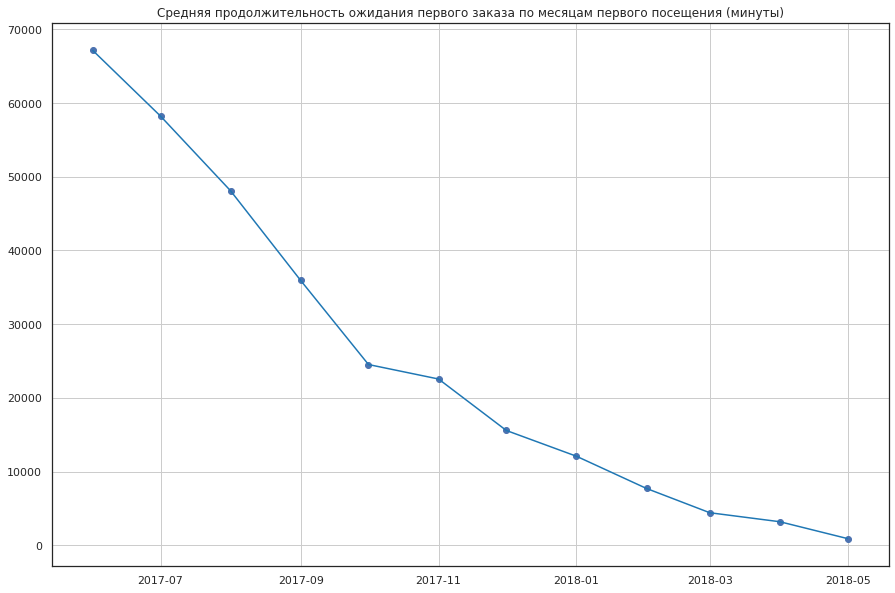

In [66]:
#добавим в таблицу месяц первого посещения 
first_visit_order_pairs['visit_month'] = first_visit_order_pairs['First Visit Ts'].astype('datetime64[M]')

#сформируем датафрейм, в котором сохраним среднее значение времени ожидания первого заказа
mean_fo_time_spent_per_month = first_visit_order_pairs.groupby('visit_month').agg({'mins_spent_for_fo': 'mean', 'Uid': 'count'}).reset_index()

#нарисуем график, который покажет нам динамику изменения среднего параметра
plt.figure(figsize=(15, 10))
plt.plot('visit_month', 'mins_spent_for_fo', data=mean_fo_time_spent_per_month, color='tab:blue')
plt.scatter('visit_month', 'mins_spent_for_fo', data=mean_fo_time_spent_per_month)
plt.grid(axis='both')
plt.title("Средняя продолжительность ожидания первого заказа по месяцам первого посещения (минуты)")

Text(0.5, 1.0, 'Медианная продолжительность ожидания первого заказа по месяцам первого посещения (минуты)')

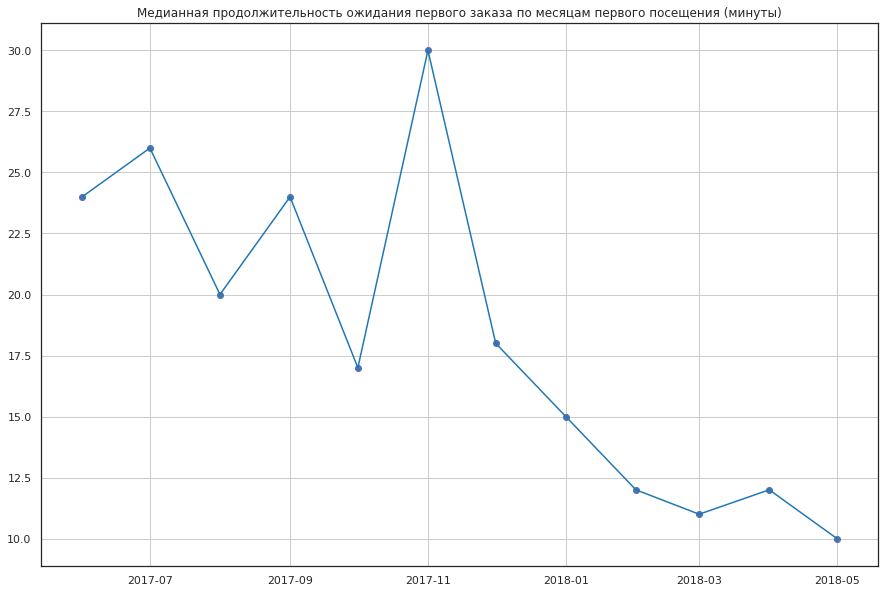

In [67]:
#попробуем оценить также динамику изменения медианного значения
median_fo_time_spent_per_month = first_visit_order_pairs.groupby('visit_month').agg({'mins_spent_for_fo': 'median', 'Uid': 'count'}).reset_index()

plt.figure(figsize=(15, 10))
plt.plot('visit_month', 'mins_spent_for_fo', data=median_fo_time_spent_per_month, color='tab:blue')
plt.scatter('visit_month', 'mins_spent_for_fo', data=median_fo_time_spent_per_month)
plt.grid(axis='both')
plt.title("Медианная продолжительность ожидания первого заказа по месяцам первого посещения (минуты)")

In [68]:
display(mean_fo_time_spent_per_month)

,visit_month,mins_spent_for_fo,Uid
0,2017-06-01,67144.820048,2923
1,2017-07-01,58225.092758,2458
2,2017-08-01,48087.235328,1721
3,2017-09-01,35925.669392,3058
4,2017-10-01,24515.209919,4678
5,2017-11-01,22550.496950,4262
6,2017-12-01,15565.759450,4074
7,2018-01-01,12072.007054,3119
8,2018-02-01,7699.013810,3186
9,2018-03-01,4405.029598,2838


<span style="text-decoration:underline">Выводы:</span>

1. Между медианным и средним значением времени, затраченного посетителями на первый заказ наблюдается большой разрыв: медиана - 16 минут, среднее 24340 минут (почти 17 дней). 
2. Максимальное значение в диапазоне 523144 минуты, что равно примерно 363 дням или почти 1 году.
3. На основе этой информации можно предположить, что часть пользователей совершают заказ почти спонтанно. Вероятно, посетив ресурс, имея конкретную цель найти мероприятие и приобрести билет. Другая группа долгое время выступала на позиции "наблюдателей", откладывая момент первой покупки
4. На графике мы наблюдаем планомерное снижение среднего времени ожидания первого заказа: если в июне 2017 года оно колебалось в районе отметки 67-68 тысяч минут, то к маю 2018 года оно снизилось несколько десятков раз (примерно до 500-1000 минут). Это может быть обсуловлено разными причинами: как повышением лояльности клиентов по отношению к сервису, так и появлением на сервисе каких-то интересных эксклюзивных предложений
5. В таблице, куда мы также включили количество пользователей, наблюдается схожая с результатами когортного анализа картина: в середене временного промежутка выборки количество пользователей также на пике. 

### Среднее количество покупок на 1 пользователя

In [69]:
#сформируем датафрейм, где путем группировки получим пары ID_пользователя-количество совершенных покупок
orders_per_user = orders.groupby('Uid').agg({'Revenue': 'count', 'Buy Ts': 'min'}).reset_index()
orders_per_user.columns=['Uid', 'orders_qty', 'first_order_ts']
print('Среднее количество покупок на 1 пользователя: {0:.1f}'.format(orders_per_user['orders_qty'].mean()))

Среднее количество покупок на 1 пользователя: 1.4


In [70]:
#также мы можем более детально взглянуть на метрики этого столбца 
display((orders_per_user['orders_qty'].describe()))

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: orders_qty, dtype: float64

In [71]:
#добавим дополнительный столбец с месяцем первого заказа для каждого пользователя 
orders_per_user['fo_month'] = orders_per_user['first_order_ts'].astype('datetime64[M]')
orders_per_user_plot = orders_per_user.groupby('fo_month').agg({'orders_qty': 'mean'}).reset_index()

Text(0.5, 1.0, 'Среднее количество покупок на пользователя по месяцам первого заказа')

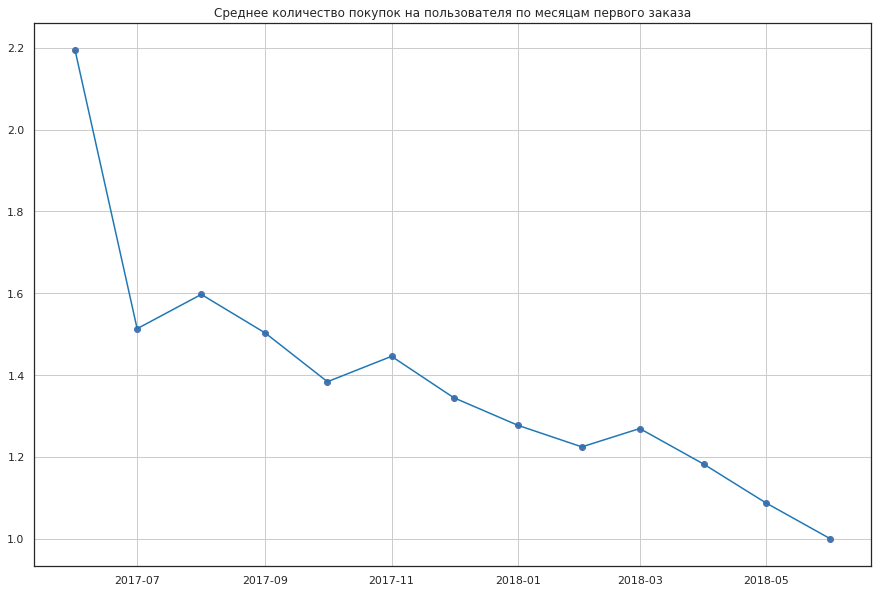

In [72]:
#нарисуем график
plt.figure(figsize=(15, 10))
plt.plot('fo_month', 'orders_qty', data=orders_per_user_plot, color='tab:blue')
plt.scatter('fo_month', 'orders_qty', data=orders_per_user_plot)
plt.grid(axis='both')
plt.title("Среднее количество покупок на пользователя по месяцам первого заказа")

Text(0.5, 1.0, 'Суммарное количество заказов в когортах по месяцу первого заказа')

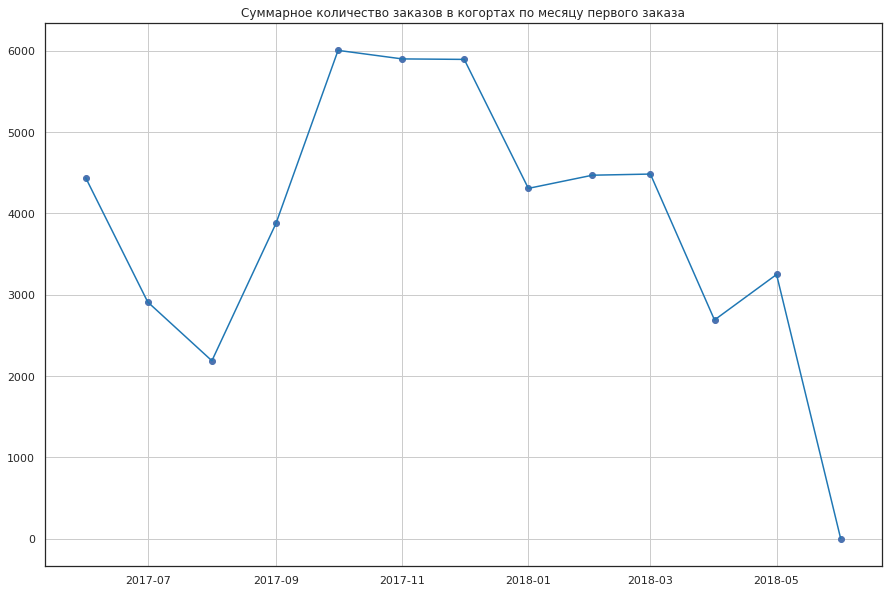

In [73]:
orders_per_user_plot = orders_per_user.groupby('fo_month').agg({'orders_qty': 'sum'}).reset_index()

plt.figure(figsize=(15, 10))
plt.plot('fo_month', 'orders_qty', data=orders_per_user_plot, color='tab:blue')
plt.scatter('fo_month', 'orders_qty', data=orders_per_user_plot)
plt.grid(axis='both')
plt.title("Суммарное количество заказов в когортах по месяцу первого заказа")

In [74]:
#оценим долю пользователей, совершивших более 1 заказа
print('Доля пользователей, совершивших более 1 заказа: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 1])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 2 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 2])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 3 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 3])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 5 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 5])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 10 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 10])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 20 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 20])/len(orders_per_user)*100))
print('Доля пользователей, совершивших более 50 заказов: {0:.1f}%'.\
      format(len(orders_per_user[orders_per_user['orders_qty'] > 50])/len(orders_per_user)*100))

Доля пользователей, совершивших более 1 заказа: 17.2%
Доля пользователей, совершивших более 2 заказов: 5.2%
Доля пользователей, совершивших более 3 заказов: 2.2%
Доля пользователей, совершивших более 5 заказов: 0.8%
Доля пользователей, совершивших более 10 заказов: 0.3%
Доля пользователей, совершивших более 20 заказов: 0.2%
Доля пользователей, совершивших более 50 заказов: 0.1%


<span style="text-decoration:underline">Выводы:</span>

1. Среднее количество покупок на 1 пользователя - 1.4. Субъективно, такое значение представляется низким (хотя конверсия посетителей в покупатели относительно высокая - порядка 16%). Вероятно, есть какая-то проблема с возможность/целесообразностью покупки, либо проблема с привлекательностью ресурса
2. На графике изменения среднего количества заказов на клиента мы видим, что в когортах по месяцу первого заказа отличается среднее количество заказов на 1 клиента
3. На графике суммарного количества заказом мы наблюдаем, что в середине рассматриваемого периода были достигнуты рекордные значения (около 6000 заказов в октября-декабре 2017 года). При этом мы наблюдаем позитивную динамику в октябре-ноябре 2017 года и феврале-марте 2018 года - сопоставление графиков вынуждает предположить, что эта динамика была следствием кумулятивного эффекта двух трехмесячных "пиковых" циклов (октябрь-декабрь 2017 по 6000 заказов в месяц, по 4500 заказов в январе-марте 2018 года)
4. Максимальное количество совершенных заказов - 239, что наводит на мысль о наличии некой группы лояльных клиентов. Доля пользователей от общего числа совершивших заказ начинает сокращаться несущественно при достижении отметки в 5 заказов на пользователя. Около 0.1% пользователей совершили более 50 заказов.

### Средний чек

In [75]:
#сумму среднего чека мы можем вычисли, используя данные таблицы заказов
print('Сумма среднего чека:', orders['Revenue'].mean().round(2), 'у.е.')

Сумма среднего чека: 5.0 у.е.


In [76]:
#в таблицу заказов добавим столбец месяцем заказа
orders['order_month'] = pd.to_datetime(orders['Buy Ts']).astype('datetime64[M]')

orders_mean_cheque_dynamics = orders.groupby('order_month').agg({'Revenue': ['mean', 'median']}).reset_index()
orders_mean_cheque_dynamics.columns=['order_month', 'mean_cheque', 'median_cheque']

orders_mean_cheque_dynamics

,order_month,mean_cheque,median_cheque
0,2017-06-01,4.060106,2.44
1,2017-07-01,5.306589,3.05
2,2017-08-01,4.847139,2.78
3,2017-09-01,5.416448,2.44
4,2017-10-01,4.928280,2.44
5,2017-11-01,4.783518,2.44
6,2017-12-01,5.852139,2.69
7,2018-01-01,4.112927,2.44
8,2018-02-01,4.840095,2.69
9,2018-03-01,5.413930,2.44


Text(0.5, 1.0, 'Средний и медианный чек по месяцам заказов')

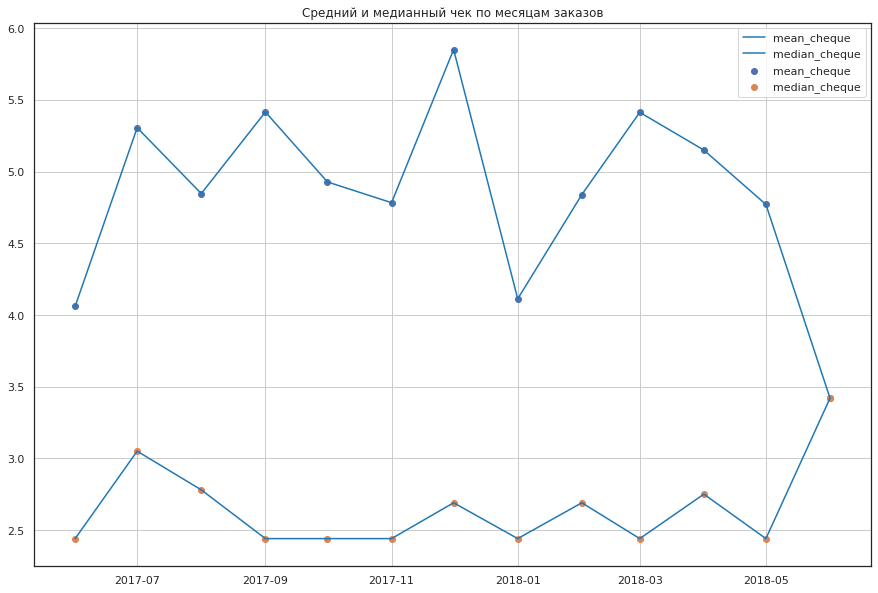

In [77]:
plt.figure(figsize=(15, 10))
plt.plot('order_month', 'mean_cheque', data=orders_mean_cheque_dynamics, color='tab:blue')
plt.scatter('order_month', 'mean_cheque', data=orders_mean_cheque_dynamics)
plt.plot('order_month', 'median_cheque', data=orders_mean_cheque_dynamics, color='tab:blue')
plt.scatter('order_month', 'median_cheque', data=orders_mean_cheque_dynamics)
plt.legend()
plt.grid(axis='both')
plt.title("Средний и медианный чек по месяцам заказов")

In [78]:
#также попробуем оценить распределение пользователей по сумме среднего чека
#воспользуемся уже существующей переменной и сохраним в нее датафрейм с количеством заказок и средним чека пользователя
orders_per_user = orders.groupby('Uid').agg({'Revenue': ['count', 'mean']}).reset_index()
orders_per_user.columns=['Uid', 'orders', 'mean_cheque']
orders_per_user['mean_cheque'] = orders_per_user['mean_cheque'].round(2)

In [79]:
orders_per_user['mean_cheque'].describe()

count    36523.000000
mean         4.093086
std          7.671233
min          0.000000
25%          1.280000
50%          2.490000
75%          4.890000
max        657.470000
Name: mean_cheque, dtype: float64

Сравнение среднего и медианы с максимум ряда позволяет понять, что в данных наблюдаются выбросы по сумме среднего чека. Для первичного анализа построим гистограмму, изолировав предельные значения.

In [80]:
#Посчитаем 1й и 99й квантили. Для гистограммы используем оставшиеся 98% значений.
q01 = np.quantile(orders_per_user['mean_cheque'], 0.01)
q99 = np.quantile(orders_per_user['mean_cheque'], 0.99)
print('1-й квантиль:', q01)
print('99-й квантиль:', q99)

1-й квантиль: 0.18
99-й квантиль: 24.44


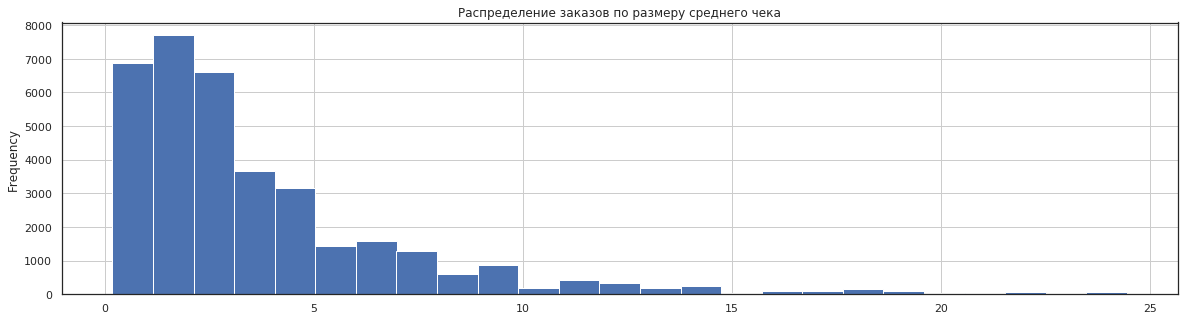

In [81]:
#строим гистограмму по диапазону, изолировав предельные значения
orders_per_user['mean_cheque'].plot(kind='hist', grid=True, bins=25, figsize=(20, 5), range=(q01, q99),\
                            title='Распределение заказов по размеру среднего чека')

В теории, на основе имеющихся данных можно также сгруппировать пользователей на группы "физических" пользователей, а также условные "компании" по сочетанию признаков: 

- Количество заказов (слишком высокая частота заказов предполагает, что клиент часто совершает транзакции, что необычно, так как предполагается последующее использование приобретенного продукта - вероятно, идентификатор пользователя в данном случае характеризует некий "общий" аккаунт. Например, аккаунт компании)
- Средняя сумма заказов (если средний чек пользователя очень высокий при относительно большом количестве заказов, мы можем предположить, что это регулярные крупные закупки билетов или похожих продуктов для групп людей: например, сотрудников организации или школьников/студентов)

In [82]:
orders_per_user.sort_values('orders', ascending=False).head(20)

,Uid,orders,mean_cheque
7206,3644482766749211722,239,6.04
27482,13888745432979765063,238,5.00
23600,11920452646463905188,227,4.95
13459,6731421022966725351,183,7.93
6922,3501596628378158474,150,4.67
10200,5139615590553126732,150,4.97
6475,3263486045884611639,131,7.73
20471,10343016064897450067,127,4.45
20003,10116135452198588850,124,5.06
12332,6166747268563050393,117,4.34


<span style="text-decoration:underline">Выводы:</span>

1. Сумма среднего чека по всему объему заказов без привязки к идентификатору пользователя - 5 условных единиц
2. На гистограмме мы наблюдаем, что почти 2/3 всего пула по среднему чеку с привязкой к пользователю - это около 3 условных единиц. В диапазоне до 5 условных единиц около 75% всех заказов в таблице
3. На графике мы видим, что средний чек обычно колеблется в диапазоне между 4.7 и 5.4 условными единицами
4. Наблюдается резкий рост суммы среднего чека в декабре почти до 6 условных единиц, а потом резкое падение до 4 - вероятно, в этот промежуток времени произошло какое-то событие
5. Также мы видим, что медианный чек изменяется незначительно, изменяясь в диапазоне от 2.5 до 3 условных единиц. 7 из 13 периодов показывают идентичную медиану - 2.44 условных единицы. Природа значения неясна, но оно определенно привлекает внимание необычной тенденцией. 

### LTV - Lifetime Value

In [83]:
#в таблицу заказов добавим столбец месяцем заказа
#orders['order_month'] = pd.to_datetime(orders['Buy Ts']).astype('datetime64[M]')
#в ранее объявленную переменную добавим столбец с месяцев первого заказа
first_orders['fo_month'] = pd.to_datetime(first_orders['First Order Ts']).astype('datetime64[M]')

In [84]:
first_orders.head()

,Uid,First Order Ts,fo_month
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01


In [85]:
#посчитаем размеры когорт по месяцу первого заказа из таблицы orders
cohort_sizes = first_orders.groupby('fo_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['fo_month', 'users']

In [86]:
#в таблицу заказов подтянем месяц первого заказа из отдельного датафрейма
orders_first_month = orders.merge(first_orders, on='Uid')
#формируем датафрейм, куда запишем когорты и сумма выручки с каждой когорты
cohorts = orders_first_month.groupby(['fo_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()
#формируем отчетный документ
report = cohorts.merge(cohort_sizes, on='fo_month')

In [87]:
#по условию маржинальность сервиса равна 100%
margin_rate = 1

#добавляем в отчетный датафрейм столбцы, необходимые для расчета ltv
report['gross_profit'] = report['Revenue'] * margin_rate
report['age'] = ((report['order_month'] - report['fo_month'])/np.timedelta64(1, 'M')).round().astype('int')
report['ltv'] = report['gross_profit'] / report['users']

In [88]:
result = report.pivot_table(index='fo_month', columns='age', values='ltv', aggfunc='mean').round(2)

In [89]:
#построим сводную таблицу
result = report.pivot_table(index='fo_month', columns='age', values='ltv', aggfunc='mean').round(2)

#делаем кумулятивное суммирование 
result = result.cumsum(axis=1)
result

age,0,1,2,3,4,5,6,7,8,9,10,11
fo_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#построим сводную таблицу с заданными ограничениями (когорта не младше полугода + шестимесячный период анализа)
result = report[(report['fo_month'] <= '2017-11-01') & (report['age'] <= 6)]\
.pivot_table(index='fo_month', columns='age', values='ltv', aggfunc='mean').round(2)

#делаем кумулятивное суммирование 
result = result.cumsum(axis=1)
result

age,0,1,2,3,4,5,6
fo_month,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38


<span style="text-decoration:underline">Выводы:</span>

1. Мы видим, что наивысшие значения выручки наблюдаются у когорт в "нулевой" месяц, то есть месяц заказа. Учитывая, что в среднем каждый клиент совершает 1.4 покупки - такие цифры выглядят закономерными, так как "старение" когорты сопровождается существенным неизбежным оттоком покупателей
2. Мы наблюдаем, что наиболее "удачный старт" у когорты июля 2017 года, но дальнейший рост LTV аналогичен другим когортам
3. Мы также наблюдаем, что к концу шестимесячного периода, которым у нас ограничен анализ, наилучший итоговый результат показывает когорта сентября 2017 года - при этом внутри когорты самый большой скачок LTV лежит между ноябрем и декабрем 2017 года (2 и 3 месяц жизненного цикла когорты). Возможно в этот период произошло какое-то событие, которое привлекло пользователей. В этот же период наблюдалось наибольшее количество заказов.

## Маркетинговые метрики

### Расчет суммы расходов на маркетинг

In [91]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum(), 'у.е.')

Общая сумма расходов на маркетинг: 329131.62 у.е.


In [92]:
#добавим в таблицу столбец с месяцев расхода
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

#формируем сводную таблицу для построения графика динамики затрат на маркетинг
costs_dynamics = (costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum') / 1000).round(3)

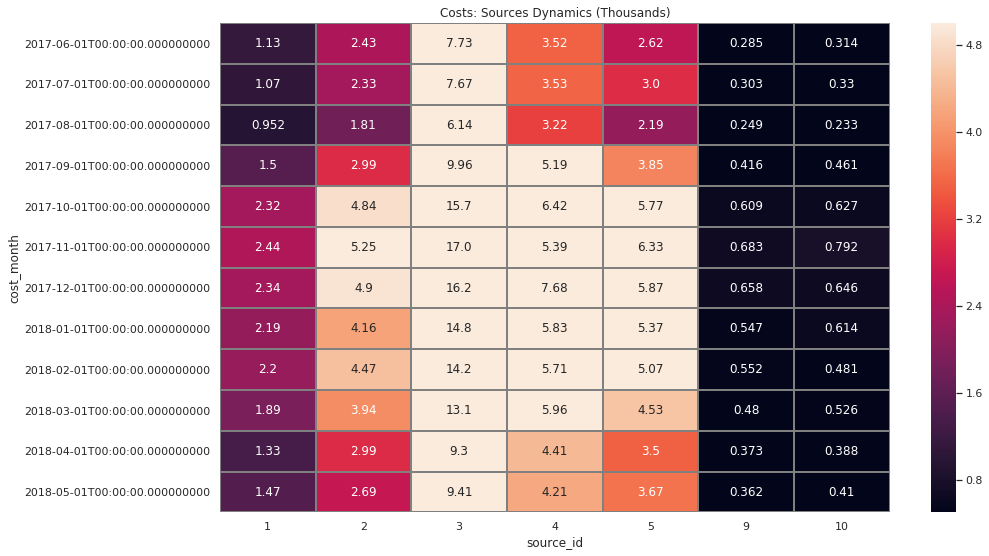

In [93]:
#построим тепловую карту по сводной таблице
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Costs: Sources Dynamics (Thousands)')
sns.heatmap(costs_dynamics, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=0.5, vmax=5); 

In [94]:
costs.groupby('source_id').agg({'costs': 'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


<span style="text-decoration:underline">Выводы:</span>

1. Общая сумма расходов - 329131.62 условных единицы
2. Мы видим, что наиболее затратный источник затрат - 3, а наименее затратный - 5 
3. На тепловой карте мы видим, что источник 3 неизменно поглащает наибольшее количество денег 
4. Осенью 2017 года существенно возрастают также затраты на источники 4 и 5. Вероятно прирост, зафиксированный ранее, обусловлен в том числе и этим фактором
5. Источники 9 и 10 стабильно генерируют минимальные затраты (500-1000 у.е.)

### Расчет CAC

Нам необходимо определить сумму затрат на привлечение 1 покупателя. В таблице заказов у нас нет номера источника, из которого пришел клиент, совершивший покупку. По этому причине необходимо получить информацию из таблицы визитов ресурса, но любой из пользователей может посетить ресурс, переходя из разных источников, что не позволяет достоверно установить, какой из источников трафика стал генератором выручки для компании.

По этой причине мы используем источник первого посещения ресурса. 

In [95]:
visits.pivot_table(index='Uid', columns='Source Id', values='visit_lenght', aggfunc='count').fillna(0).astype('int').sample(10)

Source Id,1,2,3,4,5,6,7,9,10
Uid,,,,,,,,,
3149728747163470941,0,0,0,1,0,0,0,0,0
17354591686460957205,0,1,0,0,1,0,0,0,0
3487131622671479740,0,0,0,1,0,0,0,0,0
3945756489669171973,1,0,0,0,0,0,0,0,0
19943466932850129,0,0,1,0,0,0,0,0,0
9970940450149630253,0,0,1,0,0,0,0,0,0
18412292863908390211,0,0,0,1,0,0,0,0,0
16503067442796396513,0,0,1,0,0,0,0,0,0
2651152441988249260,0,0,0,1,0,0,0,0,0


In [96]:
#снова сформируем датафрейм с ID пользователя и временем первого визита 
first_visits = visits.sort_values('Start Ts').groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visits.columns=['Uid', 'first_visit_ts']
#сливаем ее с таблицей визитов 
visits = visits.merge(first_visits, on='Uid')
#и в отдельный датафрейм отбираем все визиты по источникам
first_visits_by_sources = visits[visits['Start Ts'] == visits['first_visit_ts']]

In [97]:
print('Соответствие таблиц: {0:.2f}%'.format(((len(first_visits_by_sources)/len(visits['Uid'].unique()))*100)))

Соответствие таблиц: 100.00%


In [98]:
#сформиурем два датафрейма: визиты и заказы на пользователя
orders_per_user = orders.groupby('Uid').agg({'Revenue': 'sum', 'Buy Ts': 'count'}).reset_index()
orders_per_user.columns=['Uid', 'revenue', 'orders']
visits_per_user = first_visits_by_sources.groupby(['Source Id', 'Uid']).agg({'visit_lenght': 'mean'}).reset_index()
visits_per_user.columns=['source_id', 'Uid', 'visit_lenght']

In [99]:
#объединяем и получаем датафрейм с идентификаторами пользователей, источником трафика первого посещения, суммой заказа, 
#и количеством заказов
report = visits_per_user.merge(orders_per_user, on='Uid')
#сформируем датафрейм с количеством пользователей
revenue_per_source = report.groupby('source_id').agg({'Uid': 'nunique', 'revenue': 'sum', 'orders': 'sum'}).reset_index()

In [100]:
#сгруппируем косты по источнику и сформируем таблицу для расчета cac по источникам трафика
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_per_source.columns=['source_id', 'costs']
cac_calc = costs_per_source.merge(revenue_per_source, on='source_id')

In [101]:
cac_calc['cac'] = (cac_calc['costs'] / cac_calc['Uid']).round(2)
cac_calc

,source_id,costs,Uid,revenue,orders,cac
0,1,20833.27,2899,31090.55,5223,7.19
1,2,42806.04,3506,46923.61,6392,12.21
2,3,141321.63,10473,54511.24,13289,13.49
3,4,61073.60,10296,56696.83,12895,5.93
4,5,51757.10,6931,52624.02,9406,7.47
5,9,5517.49,1088,5759.40,1647,5.07
6,10,5822.49,1329,4450.33,1562,4.38


In [102]:
#также посчитаем cac на пользователя в целом по проекту
print('CAC на пользователя по проекту:', ((cac_calc['costs'].sum() / cac_calc['Uid'].sum())).round(2), 'у.е.')

CAC на пользователя по проекту: 9.01 у.е.


<span style="text-decoration:underline">Выводы:</span>

1. Средняя стоимость привлечения 1 покупателя составляет 9 условных единиц
2. Наиболее "дорогой" источник - 3, самый "дешевый" источник - 9
3. Любопытно, что источник 3 генерирует вторую по размеру выручку, но при этом стоимость привлечения клиента через этот источник самая высокая - вероятно, конкуренция в этом источнике высокая
4. Источник 4 приносит нам самую большую выручку с относительно невысокой стоимостью привлечения клиента (3 место в рейтинге "дешевизны")

### Расчет ROMI

Проанализируем возврат инвестиций в маркетинг по следующей логике: 

1. Данные сгруппируем в когорты по месяцу первого визита, который мы нашли ранее
2. Так как мы исходим из допущения о том, что оцениваем затраты и выручку по пользователю мы делаем в разрезе месяца его первого визита на ресурс, мы также предположим, что косты на привлечение этого пользователя можно учитывать также в разрезе месяца первого визита пользователя
3. Таким образом, каждая ячейка итоговой сводной таблицу или тепловой карты будет отражать выручку от группы пользователей пришедних на ресурс в определенный месяц и отношение выручки к инвестициям в маркетинг на привлечение этого пользователя.Так мы сможем как оценить эффективность источника, так "выгодность" одной и той же когорты в разрезе различных источников.

In [103]:
#создаем датафрейм, в котором сохраним итог для анализа - здесь мы сохраним источник первого визита
romi_cohorts = first_visits_by_sources.groupby(['Source Id', 'Uid']).agg({'visit_lenght': 'mean'}).reset_index()
romi_cohorts.columns=['source_id', 'Uid', 'visit_lenght']

#получим дату самого первого заказа для клиента
first_order_dates = orders.sort_values('Buy Ts').groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_order_dates.columns=['Uid', 'dt']
first_order_dates['dt'] = first_order_dates['dt'].astype('datetime64[M]')

#соединим ее с данными по заказам клиента
orders_per_user = orders_per_user.merge(first_order_dates, on='Uid')

#сливаем заказы с визитами и получаем таблицу, где есть информация и по месяцу первого заказа для когорты
#и по источнику, из которого произошел первый визит данного клиента
romi_cohorts = orders_per_user.merge(romi_cohorts, on='Uid')

#делаем группировку заказов по месяцу заказа и источнику
romi_cohorts = romi_cohorts.groupby(['dt', 'source_id']).agg({'revenue': 'sum', 'orders': 'sum'}).reset_index()

#в таблице костов создаем столбец с месяцем расхода по источнику
#costs['cost_month'] = costs['dt'].astype('datetime64[M]')
cost_per_month = costs.groupby(['cost_month', 'source_id']).agg({'costs': 'sum'}).reset_index()
cost_per_month.columns=['dt', 'source_id', 'costs']

#дополняем таблицу с визитами/заказами данными по костам
romi_cohorts = romi_cohorts.merge(cost_per_month, on=['source_id', 'dt'], how='left')

#считаем romi по когорте (месяц первого заказа)
romi_cohorts['romi'] = ((romi_cohorts['revenue'] - romi_cohorts['costs']) / romi_cohorts['costs'])

#выведем результат
romi_cohorts

,dt,source_id,revenue,orders,costs,romi
0,2017-06-01,1,6392.39,1143,1125.61,4.679045
1,2017-06-01,2,3915.26,635,2427.38,0.612957
2,2017-06-01,3,3640.32,878,7731.65,-0.529166
3,2017-06-01,4,4992.67,638,3514.80,0.420471
4,2017-06-01,5,4377.64,877,2616.12,0.673333
...,...,...,...,...,...,...
81,2018-05-01,4,3802.91,869,4214.21,-0.097598
82,2018-05-01,5,2094.04,539,3669.56,-0.429348
83,2018-05-01,9,223.05,62,362.17,-0.384129
84,2018-05-01,10,470.89,144,409.86,0.148905


In [104]:
#формируем сводную таблицу для визуализации
romi_pivot = romi_cohorts.pivot_table(index='dt', columns='source_id', values='romi')
romi_pivot

source_id,1,2,3,4,5,9,10
dt,,,,,,,
2017-06-01,4.679045,0.612957,-0.529166,0.420471,0.673333,0.655389,-0.232194
2017-07-01,2.115465,0.010484,-0.509922,-0.080207,-0.043450,0.210352,-0.435692
2017-08-01,1.217785,-0.435305,-0.663388,-0.319719,0.667562,0.451974,-0.100443
2017-09-01,0.574257,0.976551,-0.460102,-0.124168,3.004988,1.024012,-0.508043
2017-10-01,0.230737,0.022289,-0.581270,-0.061651,-0.010802,0.452487,-0.050635
2017-11-01,0.347875,-0.262817,-0.643603,0.475637,-0.429597,-0.039316,-0.178795
2017-12-01,-0.215056,1.881190,-0.615217,-0.181735,-0.302264,-0.126584,-0.475536
2018-01-01,-0.235054,-0.456111,-0.690139,-0.276667,-0.373790,-0.515462,-0.523187
2018-02-01,-0.236146,-0.564970,-0.674058,-0.175677,-0.402375,-0.230861,-0.336591


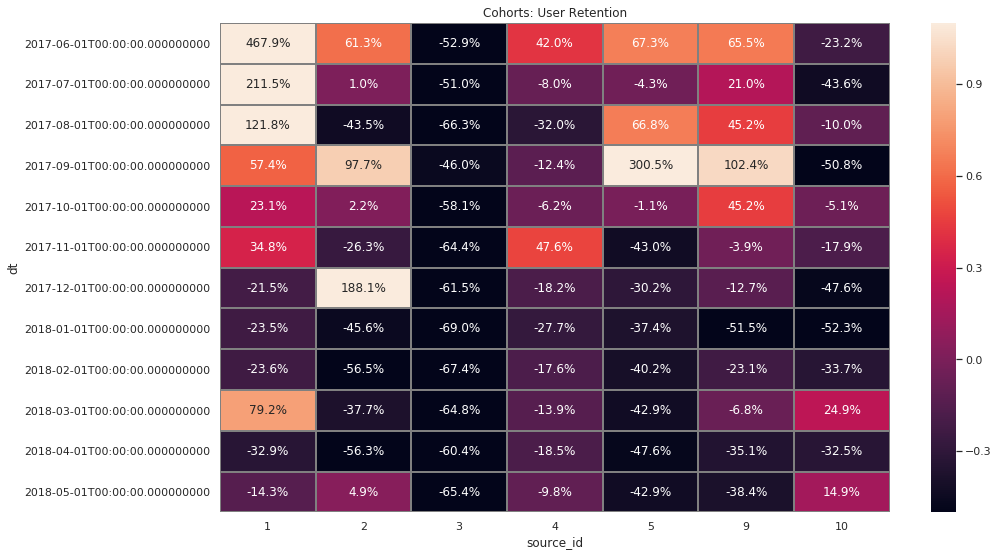

In [105]:
#построим тепловую карту по сводной таблице
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(romi_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=1.1, vmin=-0.5); 

<span style="text-decoration:underline">Выводы:</span>

1. Мы видим, что на "старте" (в июне 2017 года) почти все источники показали высокую эффективность (например, 1-й источник показывает 468% ROMI). Вероятно, такой пик - это результат "новизны" сервиса и соответствующего интереса к нему со стороны пользователей. "Ударные" стартовые вложения в маркетинг вряд ли послужили причиной, что видно из суммарных расходов в июне 2017 года. Исключение составляют источники 3 и 10. 
2. По 3-му источнику наблюдается постоянный негативный коэффициент ROMI, что наводит на мысль о низкой эффективности этого источника как генератора выручки, хотя этот источник привел на ресурс наибольшее количество пользователей, которые создали вторую по размеру выручку. Вероятно, покупатели тут, либо "случайные" и совершают небольшие импульсивные покупки, либо канал имеет какую-ту свою специфику (например, скидки).
3. Мы видим, что все источники со временем показывают отрицательный коэффициент ROMI - так как пользователи, привлеченные в какой-либо из месяц генерируют выручку на протяжении всего жизненного цикла когорты и, возможно, у более поздних когорт еще нет достаточного количества заказов. Однако следует помнить, что среднее количество покупок на пользователя - 1.4, что не так много и мы можем предположить, что пользователи часто просто не возвращаются на ресурс.

# Выводы и рекомендации

## Наиболее перспективные источники трафика

In [106]:
#сформируем таблицу, куда подтянем все характеристики каждого источника глобально по всему периоду 
sources_analysis = report.groupby('source_id').agg({'Uid': 'nunique', 'orders': ['sum', 'mean'], 'revenue': ['sum', 'mean']}).reset_index()
sources_analysis.columns=['source_id', 'customers', 'orders', 'orders_per_user', 'revenue', 'revenue_per_user']
sources_analysis = sources_analysis.merge(costs_per_source, on='source_id', how='left')
sources_analysis['cac'] = sources_analysis['costs'] / sources_analysis['customers']
sources_analysis['romi'] = ((sources_analysis['revenue'] - sources_analysis['costs']) / sources_analysis['costs'])*100
sources_analysis = sources_analysis.fillna(0).round(2)
sources_analysis

,source_id,customers,orders,orders_per_user,revenue,revenue_per_user,costs,cac,romi
0,1,2899,5223,1.80,31090.55,10.72,20833.27,7.19,49.24
1,2,3506,6392,1.82,46923.61,13.38,42806.04,12.21,9.62
2,3,10473,13289,1.27,54511.24,5.20,141321.63,13.49,-61.43
3,4,10296,12895,1.25,56696.83,5.51,61073.60,5.93,-7.17
4,5,6931,9406,1.36,52624.02,7.59,51757.10,7.47,1.67
5,7,1,1,1.00,1.22,1.22,0.00,0.00,0.00
6,9,1088,1647,1.51,5759.40,5.29,5517.49,5.07,4.38
7,10,1329,1562,1.18,4450.33,3.35,5822.49,4.38,-23.57


<span style="text-decoration:underline">Анализ:</span>

1. Источник 4 сгенерировал наибольшую выручку - 56697 у.е. Его выручка примерно на одном уровне с источником 3 (54511 у.е.). Следует отметить, что количество пользователей и заказов также примерно сопоставимы - это подтверждается средним количеством заказов на 1 покупателя (1.25 для 4 источника и 1.27 для 3). На третье строчке по выручке находится источник 5 с выручкой в 52624 условных единицы (при этом, среднее количество заказов на 1 клиента выше - 1.36). Можем предположить, что покупатели из источника 5 остаются более лояльным к сервису и с большей вероятностью склоняются к совершению последующих заказов.
2. Для 3 упомянутых источников мы располагаем данными о возврате инвестиций в маркетинг на протяжении всего периода. Наихудший результат по этому параметру показывает "второе место" - источник 3. Маркетинговые затраты для него более чем вдвое превышают затраты остальных источников "топовой тройки" и в принципе являтся максимальным значением. Если такие инвестиции не имеют под собой стратегическую основу в виде последующей экспансии, то такой источник трафика сложно назвать эффективным, так как он генерирует убытки
3. Интересны источники 1 и 2. Судя по характеристикам, клиенты, пришедшие из этих источников, очень интересны нашей компании: они платежеспособны, лояльны и приносят компании прибыль:
    + У обоих позитивный ROMI
    + У источника 1 - максимальный ROMI среди всех источников  (49.24% за весь период)
    + Средняя выручка на 1 пользователя в 1.5-2 раза выше выручки из остальных источников 
    + Максимум среднего количества заказов на покупателя у источника 2 (при этом, источник 1 отличается незначительно: 1.82 и 1.80)
    + Наблюдается явный и довольно существенный разрыв между средней выручкой с 1 заказа и CAC
4. Сервис несет сопоставимые маркетинговые затраты на привлечение покупателей через источники 9 и 10, однако источник 9 можно охарактеризовать как "интересный" в силу относительно высокого среднего количества заказов на 1 покупателя (1.51), и позитивного ROMI. В любом случае, сервис наверняка несет убытки так как выручка едва покрывает рекламные затраты, но перспектива есть. В то же время, источник 10 также генерирует сравнительно небольшой поток покупателей (в 7-10 раз меньше "топа"), но при этом показывает небольшую выручку с 1 пользователя и отрицательный коэффициент возврата инвестиций
5. Источник 7 в таблице выглядит аномалией - он сгенерировал всего 1 заказ за весь период на небольшую сумму. Сервис не несет затрат на привлечение клиентов через этот источник, однако само его существование заставляет предполагать, что есть потенциальная возможность привлечь клиентов через дополнительный канал (каналы). В данном случае было бы неплохо более детально проанализировать этот источник и, возможно, сделать бенчмаркинг рынка похожих сервисов - возможно кто-то из актуальных/потенциальных конкурентов генерирует поток выручки через этот канал.

<span style="text-decoration:underline">Рекомендации:</span>

1. Проанализировать целесообразность и оптимальность маркетинговых затрат на источники 3, 4 и 5:
    + Проанализировать возможность более точного таргетирования
    + Проанализировать возможность повышения лояльности потока клиентов
2. Уделить повышенное внимание источникам 1 и 2
    + Рассмотреть возможность увеличения затрат на маркетинг
    + Рассмотреть способы повышения лояльности этой группы клиентов: например, предложить подписку или премиальный сервис
3. Оценить целесообразность маркетинговых затрат на источники 9 и 10:
    + Источник 10 на текущий выглядит не слишком интересно
4. Рассмотреть перспективы расширения спектра источников, так как они, вероятно, есть (источник 7).
    

## Анализ метрик

In [107]:
print('Среднесуточное количество активных пользователей:', dau['users'].mean().round().astype('int'), 'человек')
print('Средненедельное количество активных пользователей:', wau['Uid'].mean().round().astype('int'), 'человек')
print('Среднемесячное количество активных пользователей:', mau['Uid'].mean().round().astype('int'), 'человек')

Среднесуточное количество активных пользователей: 908 человек
Средненедельное количество активных пользователей: 5716 человек
Среднемесячное количество активных пользователей: 23228 человек


<span style="text-decoration:underline">Выводы:</span>

1. Мы видим, что среднее количество пользователей практически линейно возрастает по мере расширения расчетного периода. Также мы знаем, что среднее количество визитов 1 пользователя на ресурс - 1.08, что наводит на мысль о том, что наш ресурс имеет некий паттерн целевого использования - пользователи предпочитают не использовать его по аналогии с "домашней страницей" или агрегатором новостей. Вероятно, на ресурсе отсутствует интересный обновляемый контент, который позволит повысить частоту посещений.
2. Гипотеза относительно недостаточного количества контента также косвенно подтверждается временем сессии - несмотря на выбросы в виде очень длинных сессий, мода датасета - 60 секунда, а на гистограмме видно, что сессия примерно 40% всех визитов не превышает 4 минут. Вероятно, эта длина определяется скоростью поиска нужной страницы на сайте. 
3. Субъективно, Retention Rate показывает, что очень небольшой процент пользователей (1-5%) возвращается на ресурс впоследствии. Вероятно, есть косвенная связь между "интересностью" ресурса как источника информации (которая невысока, судя по вышеописанным метрикам) и вероятностью возврата пользователя в будущем - так как ресурс на текущий момент скорее всего в большей степени имеет сугубо "прагматичную" функциональность, пользователи могут мигрировать на другие сервисы. Также дополнительный анализ распределения визитов по месяцам показывает, что к концу периода у ресурса существенно снизалась "популярность" - возможно, появилось большое количество альтернатив.
4. Медианное время между первым посещением и покупкой - 16 минут, при среднем значении в 17 дней. На графике, показывающем изменение среднего значения этой метрики, мы видим, что в динамике наблюдается значительное сокращение: : если в июне 2017 года оно колебалось в районе отметки 67-68 тысяч минут, то к маю 2018 года оно снизилось несколько десятков раз (примерно до 500-1000 минут). Так как "потолок" величины естественным образом снижается при движении к "правой" границе временной оси, с большей уверенностью мы можем положиться на начальный период - тем не менее, наблюдается динамика к сокращению. Менее "ровная" картина наблюдается на графике изменения медианного времени: мы видим пик в ноябре 2017 года на отметке в 30 минут (при старте примерно на уровне 24 минут). 
5. Мы наблюдаем сокращение среднего количества покупок с 2.2 в начале периода до 1 в конце - вероятно, требуется проанализировать - это негативная динамика, так как снижается лояльность пользователей. Также, на графике количества заказов в когортах по месяцам первого заказа видно, что "пик" наблюдался осенью-зимой 2017 года (порядка 6000 заказов в месяц) и постепенно это число стало снижаться. 
6. Средний чек на пользователя - 5 у.е., что ниже средних расходов на привлечение 1 клиента (в районе 9 у.е.). Такое финансовое положение сложно назвать здоровым. 

<span style="text-decoration:underline">Рекомендации:</span>

1. Проанализировать функциональность ресурса - возможно увеличить количество и скорость воспроизводства контента для удержания посетителей как в разрезе месяца/года, так и в разрезе 1 конкретной сессии
2. Наблюдается "разрыв" между средней продолжительностью визита и временем между первым визитом и покупкой. Возможно пользователю требуется несколько визитов для совершения покупки - стоит проанализировать: 
    + Ценовую политику ресурса
    + Простоту процедуры совершения покупки
3. Требуется анализ рынка аналогичных сервисов для понимания альтернатив нашему сервису
4. Требуется анализ эффективности маркетинговых затрат - соотношение среднего чека и CAC говорит о низкой эффективности

## Итоги когортного анализа

<span style="text-decoration:underline">Выводы:</span>
    
1. По LTV можно выделить две явно "лидирующие" когорты: это июнь и сентябрь 2017 года. При этом, сентябрьская когорта показывает наилучшее значение, достигнув LTV 13.43 к 8 периоду lifetime
2. Также мы наблюдаем снижение динамики прироста LTV для когорт с января 2018 года - это соотносится с общей "негативной" динамикой сервиса: падение количества заказов и снижением количества заказов на 1 пользователя после пика осенью-зимой 2017 года